In [1]:
import torch  
import torch.nn as nn
import numpy as np
import pandas as pd
import geopandas as gpd
import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split as tts
import plotly.graph_objects as plt
import seaborn as s
import matplotlib.pyplot as pt

# Part 1

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
list_available_datasets() #minimum tmeps in aus is not available here 

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [4]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set up the Kaggle API client
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset = 'paulbrabban/daily-minimum-temperatures-in-melbourne'
api.dataset_download_files(dataset, path='.', unzip=True)

file_path = r'C:\Users\Ankit\Documents\Vedanshi\IISERB-ML-DL-course\answers\daily-minimum-temperatures-in-me.csv'
df = pd.read_csv(file_path, header=0, on_bad_lines='skip', names=['Date','min_temp'])
df['Date'] = pd.to_datetime(df['Date'])
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce') 
df.head()

Dataset URL: https://www.kaggle.com/datasets/paulbrabban/daily-minimum-temperatures-in-melbourne


,Date,min_temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
df.isna().sum() #dataset is clean.
df = df.dropna(subset=['min_temp'])

In [6]:
print('\n\n\n\n',df.describe(),df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3647 non-null   datetime64[ns]
 1   min_temp  3647 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.5 KB




                                 Date     min_temp
count                           3647  3647.000000
mean   1986-01-01 03:18:12.733753792    11.186647
min              1981-01-01 00:00:00     0.000000
25%              1983-07-03 12:00:00     8.300000
50%              1986-01-02 00:00:00    11.000000
75%              1988-07-01 12:00:00    14.000000
max              1990-12-31 00:00:00    26.300000
std                              NaN     4.061671 None


In [7]:
df.dtypes

Date        datetime64[ns]
min_temp           float64
dtype: object

In [8]:
fig1 = plt.Figure(data=plt.Scatter(x=df['Date'], y=df['min_temp'], mode='markers'))
fig1.update_layout(title='Daily Minimum Temperatures in Melbourne (Scatter Plot)',
                   xaxis_title='Date', yaxis_title='Minimum Temperature')
fig1.show(renderer='browser')

fig2 = plt.Figure(data=plt.Scatter(x=df['Date'], y=df['min_temp'], mode='lines'))
fig2.update_layout(title='Daily Minimum Temperatures in Melbourne (Line Plot)',
                   xaxis_title='Date', yaxis_title='Minimum Temperature')
fig2.show(renderer='browser')

In [9]:
sacle=skp.StandardScaler()
df['min_temp_scaled'] = sacle.fit_transform(df[['min_temp']].astype(float))
fig = plt.Figure(data=plt.Scatter(x=df['Date'], y=df['min_temp_scaled'], mode='markers', name='Scaled Minimum Temperatures'))
fig.update_layout(title='Daily Minimum Temperatures in Melbourne (scatter Plot)',
                   xaxis_title='Date', yaxis_title='scaled Minimum Temperature')
fig.show(renderer='browser')

# the data is forming sin like pattern. 

#### Rolling mean 
- is a statistical calculation used to analyze data points by creating a series of averages of different subsets of the full dataset. It's particularly useful for smoothing out short-term fluctuations and highlighting longer-term trends or patterns in time series data.

- The main purpose of a rolling mean is to smooth out short-term fluctuations or noise in the data, providing a clearer picture of underlying trends or patterns.

In [10]:
df['rolling_mean']=df['min_temp'].rolling(window=7).mean()
df.dropna(inplace=True)
df

,Date,min_temp,min_temp_scaled,rolling_mean
6,1981-01-07,15.8,1.135982,17.057143
7,1981-01-08,17.4,1.529963,16.585714
8,1981-01-09,21.8,2.613409,17.142857
9,1981-01-10,20.0,2.170181,17.314286
10,1981-01-11,16.2,1.234477,17.542857
...,...,...,...,...
3645,1990-12-27,14.0,0.692754,13.100000
3646,1990-12-28,13.6,0.594259,13.171429
3647,1990-12-29,13.5,0.569635,13.214286
3648,1990-12-30,15.7,1.111359,13.471429


In [11]:
#scaling the data using minmax scaler to normlize the data.
scaler=skp.MinMaxScaler()
df['norm_temp']=scaler.fit_transform(df[['min_temp']])
df['norm_rm']=scaler.fit_transform(df[['rolling_mean']])
df

,Date,min_temp,min_temp_scaled,rolling_mean,norm_temp,norm_rm
6,1981-01-07,15.8,1.135982,17.057143,0.600760,0.786378
7,1981-01-08,17.4,1.529963,16.585714,0.661597,0.760836
8,1981-01-09,21.8,2.613409,17.142857,0.828897,0.791022
9,1981-01-10,20.0,2.170181,17.314286,0.760456,0.800310
10,1981-01-11,16.2,1.234477,17.542857,0.615970,0.812693
...,...,...,...,...,...,...
3645,1990-12-27,14.0,0.692754,13.100000,0.532319,0.571981
3646,1990-12-28,13.6,0.594259,13.171429,0.517110,0.575851
3647,1990-12-29,13.5,0.569635,13.214286,0.513308,0.578173
3648,1990-12-30,15.7,1.111359,13.471429,0.596958,0.592105


In [12]:
#seeing the norm data
fig_norm = plt.Figure(data=plt.Scatter(x=df['Date'], y=df['norm_temp'], mode='markers', name='normalized Minimum Temperatures'))
fig_norm.update_layout(title='Daily Minimum Temperatures in Melbourne (scatter Plot)',
                   xaxis_title='Date', yaxis_title='normalized Minimum Temperature')
fig_norm.show(renderer='browser')

In [13]:
#seeing the normrolling mean
fig_rm = plt.Figure(data=plt.Scatter(x=df['Date'], y=df['norm_rm'], mode='markers', name='normalized rolling mean'))
fig_rm.update_layout(title='Normalized rolling mean',
                   xaxis_title='Date', yaxis_title='normalized rolling mean')
fig_rm.show(renderer='browser')

In [14]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [15]:
x,y=create_sequences(df['norm_temp'].values,7)
print(x.shape,'\n',y.shape)

(3634, 7) 
 (3634,)


# Part 2 

In [16]:
# Simple neural network to perform regression
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(7, 64) #input layer
        self.relu1 = nn.ReLU()#activation of the first hidden layer
        self.fc2 = nn.Linear(64, 64)# connections between the 1st and 2nd hidden layer.
        self.relu2 = nn.ReLU()# activation for the last hidden layer.
        self.fc3 = nn.Linear(64, 1)# output layer

#x = x_train
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Part 3

In [17]:
model = RegressionNN()
# Loss function 
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
x_train,x_test,y_train,y_test=tts(x, y, test_size=0.2, random_state=42)
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [19]:
print(f"Shape of X_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: torch.Size([2907, 7])
Shape of y_train: torch.Size([2907, 1])
Shape of X_test: torch.Size([727, 7])
Shape of y_test: torch.Size([727, 1])


In [20]:
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train) #checkin the loss against the y_train.
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear the gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update the weights

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
model.eval()
with torch.no_grad():
    predictions = model(x_test)
    rmse = torch.sqrt(criterion(predictions, y_test))
    print(f"Test RMSE: {rmse.item()}")



Epoch [100/10000], Loss: 0.0093
Epoch [200/10000], Loss: 0.0084
Epoch [300/10000], Loss: 0.0083
Epoch [400/10000], Loss: 0.0082
Epoch [500/10000], Loss: 0.0082
Epoch [600/10000], Loss: 0.0081
Epoch [700/10000], Loss: 0.0081
Epoch [800/10000], Loss: 0.0080
Epoch [900/10000], Loss: 0.0080
Epoch [1000/10000], Loss: 0.0080
Epoch [1100/10000], Loss: 0.0080
Epoch [1200/10000], Loss: 0.0079
Epoch [1300/10000], Loss: 0.0079
Epoch [1400/10000], Loss: 0.0079
Epoch [1500/10000], Loss: 0.0078
Epoch [1600/10000], Loss: 0.0078
Epoch [1700/10000], Loss: 0.0078
Epoch [1800/10000], Loss: 0.0077
Epoch [1900/10000], Loss: 0.0077
Epoch [2000/10000], Loss: 0.0077
Epoch [2100/10000], Loss: 0.0076
Epoch [2200/10000], Loss: 0.0076
Epoch [2300/10000], Loss: 0.0076
Epoch [2400/10000], Loss: 0.0075
Epoch [2500/10000], Loss: 0.0075
Epoch [2600/10000], Loss: 0.0075
Epoch [2700/10000], Loss: 0.0074
Epoch [2800/10000], Loss: 0.0074
Epoch [2900/10000], Loss: 0.0074
Epoch [3000/10000], Loss: 0.0074
Epoch [3100/10000],

# Part 4

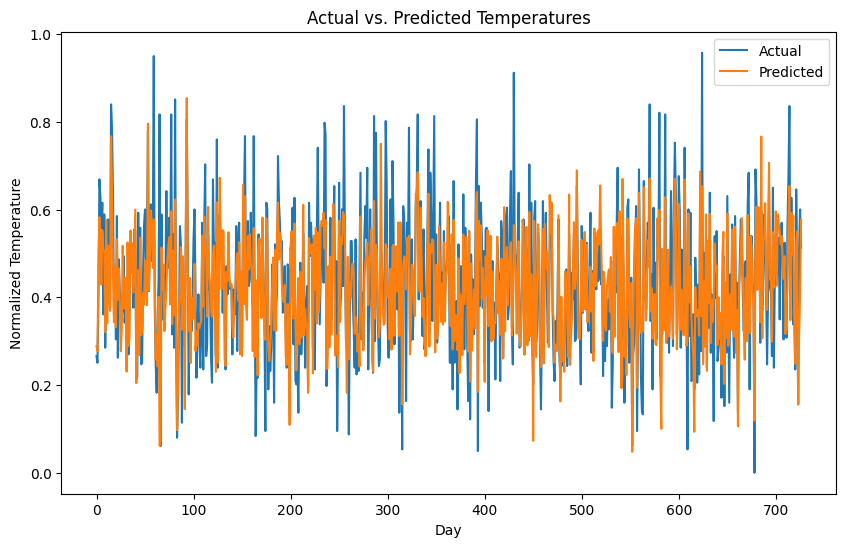

In [21]:
pt.figure(figsize=(10, 6))
pt.plot(y_test.numpy(), label='Actual')
pt.plot(predictions.numpy(), label='Predicted')
pt.legend()
pt.xlabel('Day')
pt.ylabel('Normalized Temperature')
pt.title('Actual vs. Predicted Temperatures')
pt.show()

# Part 5

In [22]:
num_predictions = 6

for i in range(num_predictions):
    # Select the last 7 days of normalized temperature for prediction
    start_index = -(i + 8)  # Adjusted to ensure slicing works properly
    end_index = -(i + 1)    # Exclusive end index

    # Ensure the slicing works even if we reach the start of the array
    if start_index < -len(df['norm_temp']):
        print("Not enough data to make more predictions")
        break

    new_data = df['norm_temp'].values[start_index:end_index]
    new_data = torch.tensor(new_data, dtype=torch.float32).view(1, -1)
    
    # Making predictions
    model.eval()
    with torch.no_grad():
        new_predictions = model(new_data)

    actual_temp_index = -7 + i + 1 # Index for actual temperature
    if actual_temp_index < -len(df['norm_temp']):
        print("Not enough data to compare actual values")
        break

    actual_temp = df['norm_temp'].values[actual_temp_index]
    print(f"Predicted temperature for the next day: {new_predictions.item()}\nActual temperature for the next day: {actual_temp}\n")

Predicted temperature for the next day: 0.5626949667930603
Actual temperature for the next day: 0.5551330798479087

Predicted temperature for the next day: 0.5378429889678955
Actual temperature for the next day: 0.532319391634981

Predicted temperature for the next day: 0.537828266620636
Actual temperature for the next day: 0.5171102661596958

Predicted temperature for the next day: 0.5244754552841187
Actual temperature for the next day: 0.5133079847908745

Predicted temperature for the next day: 0.5247693657875061
Actual temperature for the next day: 0.596958174904943

Predicted temperature for the next day: 0.5009956359863281
Actual temperature for the next day: 0.49429657794676807



# Analysis 
- the model is actually not able to predict the extreme tempratures i.e after 0.8 and before 0.1, its predicting the tempratues accurately between the ranges (0.1,0.8).

- increasing the iterations also did not help, it led to over fitting as loss increased from 0.10 to 0.12 with increase in iterations.

- for improving the performance finding a combination of hyperparameters and optimizer such that loss appoches 0.